# Simple Regression Example

### This demonstration uses synthesised test data, synthesised using England census data.

In [112]:
import pandas as pd # for dataframe manipulation
import numpy as np # for vectorising and working with arrays

# sklearn models
from sklearn.linear_model import LinearRegression # Linear Model
from sklearn.dummy import DummyRegressor # Dummy models to test if a regression is worth it
# sklearn metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
# sklearn splitter for splitting data prior to testing
from sklearn.model_selection import train_test_split

# plotting and charting results
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [92]:
df = pd.read_csv('demo.csv', sep='\t', encoding='utf-8')

In [93]:
# check column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5000 non-null   int64 
 1   icb                     5000 non-null   object
 2   age                     5000 non-null   int64 
 3   ethnic_group            5000 non-null   object
 4   disability              5000 non-null   object
 5   sex                     5000 non-null   object
 6   unpaid_care_hours_week  5000 non-null   int64 
 7   care_months             5000 non-null   int64 
 8   ae_atts_last_12m        5000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 351.7+ KB


In [94]:
df.head(5)

,Unnamed: 0,icb,age,ethnic_group,disability,sex,unpaid_care_hours_week,care_months,ae_atts_last_12m
0,0,NHS North East and North Cumbria Integrated Ca...,61,White,Not disabled under the Equality Act,Female,28,72,27
1,1,NHS Mid and South Essex Integrated Care Board,9,Mixed or Multiple ethnic groups,Not disabled under the Equality Act,Male,23,6,2
2,2,"NHS Bath and North East Somerset, Swindon and ...",14,White,Not disabled under the Equality Act,Female,5,1,0
3,3,NHS Hampshire and Isle of Wight Integrated Car...,60,White,Disabled under the Equality Act,Male,42,57,39
4,4,NHS Mid and South Essex Integrated Care Board,29,"Black, Black British, Black Welsh, Caribbean o...",Not disabled under the Equality Act,Female,57,7,8


In [95]:
df.shape

(5000, 9)

In [96]:
df.describe()

,Unnamed: 0,age,unpaid_care_hours_week,care_months,ae_atts_last_12m
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2499.500000,37.488400,16.423000,30.097800,6.621200
std,1443.520003,19.608028,17.803243,27.893875,8.072443
min,0.000000,4.000000,1.000000,1.000000,0.000000
25%,1249.750000,21.000000,1.000000,7.000000,1.000000
50%,2499.500000,37.000000,9.000000,22.000000,4.000000
75%,3749.250000,54.000000,27.000000,46.000000,9.000000
max,4999.000000,73.000000,63.000000,121.000000,72.000000


In [97]:
# Check for nulls
df[df.isnull().any(axis=1)].head()

,Unnamed: 0,icb,age,ethnic_group,disability,sex,unpaid_care_hours_week,care_months,ae_atts_last_12m


In [98]:
 # delete unnamed as looks like an index with no bearing on task.
del df['Unnamed: 0']

In [99]:
# Check descriptive statistics for numeric columns
df.describe()

,age,unpaid_care_hours_week,care_months,ae_atts_last_12m
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,37.488400,16.423000,30.097800,6.621200
std,19.608028,17.803243,27.893875,8.072443
min,4.000000,1.000000,1.000000,0.000000
25%,21.000000,1.000000,7.000000,1.000000
50%,37.000000,9.000000,22.000000,4.000000
75%,54.000000,27.000000,46.000000,9.000000
max,73.000000,63.000000,121.000000,72.000000


## Linear regression to predict the number of A&E attendences unpaid carers might have in a 12 month period.

### Exploritory Data Analysis

[Text(0, 0.5, '')]

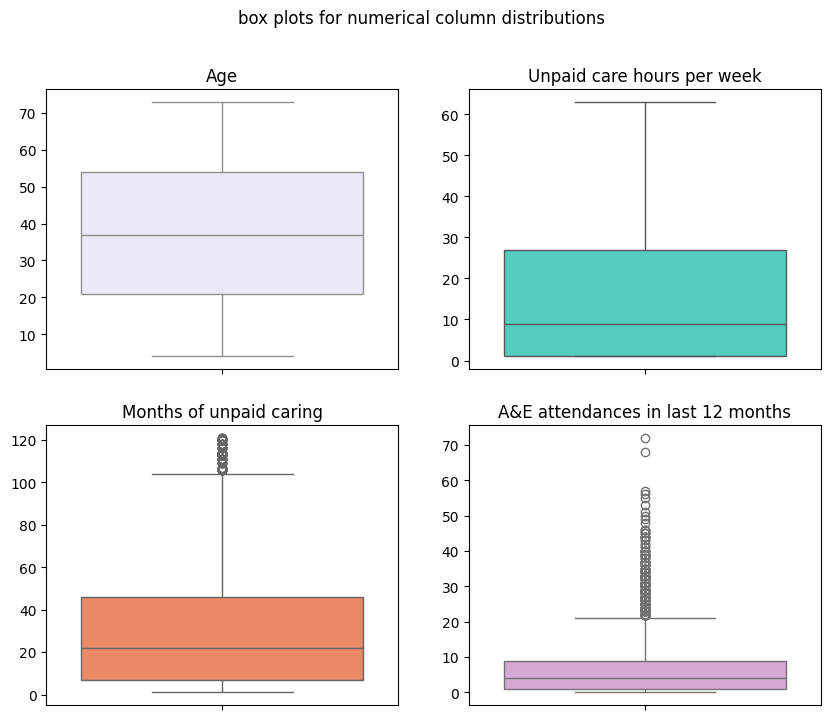

In [100]:
# Set up plot array (2*2)
fig, axes = plt.subplots(2, 2, figsize=(10,8))
fig.suptitle('box plots for numerical column distributions')

# Plotting the charts
sns.boxplot(data=df['age'], ax=axes[0, 0], color='lavender')
axes[0, 0].set_title('Age')
axes[0, 0].set(ylabel=None)
sns.boxplot(data=df['unpaid_care_hours_week'], ax=axes[0, 1], color='turquoise')
axes[0, 1].set_title('Unpaid care hours per week')
axes[0, 1].set(ylabel=None)
sns.boxplot(data=df['care_months'], ax=axes[1, 0], color='coral')
axes[1, 0].set_title('Months of unpaid caring')
axes[1, 0].set(ylabel=None)
sns.boxplot(data=df['ae_atts_last_12m'], ax=axes[1, 1], color='plum')
axes[1, 1].set_title('A&E attendances in last 12 months')
axes[1, 1].set(ylabel=None)

In [125]:
col_map = {
    'age': 'Age',
    'care_months': 'Months Caring',
    'unpaid_care_hours_week': 'Weekly Hours on Care',
    'ae_atts_last_12m': 'Emergency attendances'
}

In [126]:
# Create a streamlined dataset which can be used forr charting
df_hm = df[['age', 'care_months','unpaid_care_hours_week','ae_atts_last_12m']].copy()
df_hm.rename(columns=col_map, inplace=True)

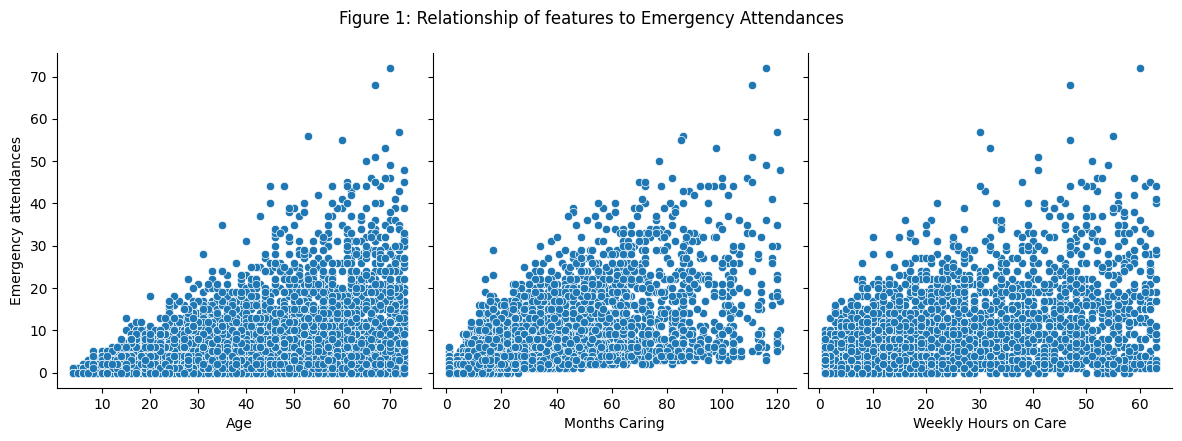

In [134]:
# Using pairplot we'll visualize the data for correlation
g = sns.pairplot(
    data=df_hm,
    x_vars=['Age', 'Months Caring','Weekly Hours on Care'],
    y_vars='Emergency attendances',
    height=4,
    aspect=1,
    kind='scatter')
g.fig.suptitle("Figure 1: Relationship of features to Emergency Attendances", y=1.08) # y= some height>1


plt.show()

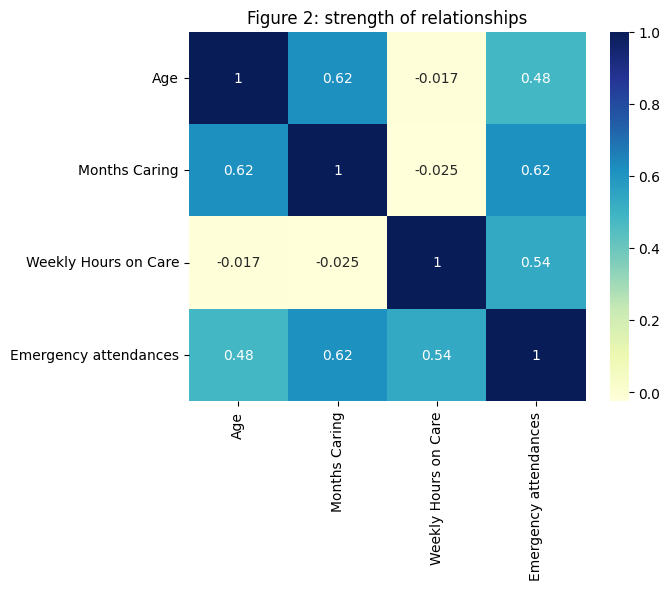

In [133]:
# Visualizing the data using heatmap to see the relationships between columns
ax = plt.axes()
sns.heatmap(df_hm.corr(), cmap="YlGnBu", annot = True, ax = ax)

ax.set_title('Figure 2: strength of relationships')
plt.show()

From the above heatmap it can be seen that while Months is the highest predictor for Emergency Attendances, it is closely followed by Weekly Hours Caring. Though Age is the lowest predictor and is just below 50% it is not that much further behind.

Building a model

In [129]:
# Feature Data
X = df[['age', 'care_months','unpaid_care_hours_week']]

# Target Data
y = df['ae_atts_last_12m']

In [ ]:
# Split data to test and train sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=324)

In [ ]:
# Define the Dummy Model
dummy_model = DummyRegressor(strategy="mean")
dummy_model.fit(X_train,y_train)

DummyRegressor()

In [ ]:
# Create dummy predictions
y_pred_dummy = dummy_model.predict(X_test)

In [105]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Check Linear model Y intercept and coefficients for 'age', 'care_months','unpaid_care_hours_week'
## note this is not possible with DummyRegressor
print(regressor.intercept_)
print(regressor.coef_)

-4.662597747475396
[0.06794994 0.15480209 0.24963637]


In [ ]:
# Create dummy predictions
y_pred = regressor.predict(X_test)

In [ ]:
# Score the dummy model to see performance
r2_dummy = r2_score(y_test,y_pred_dummy)
rmse_dummy = root_mean_squared_error(y_test,y_pred_dummy)
nrmse_dummy = rmse_dummy / (np.max(y_test) - np.min(y_test))
print("Dummy scores")
print(f'R squared score: {r2_dummy}')
print(f'Root Mean Squared Error: {rmse_dummy}')
print(f'y_test range:{(np.max(y_test) - np.min(y_test))}')
print(f'Normalised root Mean Squared Error: {nrmse_dummy}')

Dummy scores
R squared score: -0.0006001323002535752
Root Mean Squared Error: 7.487573508640132
y_test range:55
Normalised root Mean Squared Error: 0.1361377001570933


In [ ]:
# Score the linear model to see performance
r2 = r2_score(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
nrmse = rmse / (np.max(y_test) - np.min(y_test))
print("Linear scores")
print(f'R squared score: {r2}')
print(f'Root Mean Squared Error: {rmse}')
print(f'y_test range:{(np.max(y_test) - np.min(y_test))}')
print(f'Normalised root Mean Squared Error: {nrmse}')

Linear scores
R squared score: 0.697713794486943
Root Mean Squared Error: 4.115475168474022
y_test range:55
Normalised root Mean Squared Error: 0.07482682124498222


## Let's test the regressor

In [160]:
# Get a test row from the test set
test = X_test.iloc[100]
expected = y_test.iloc[100]
print(f'Using the values Age: {test.iloc[0]}, care_months: {test.iloc[2]}, unpaid_care_hours_week: {test.iloc[2]} we expect the result {expected} emergency attendances')

Using the values Age: 53, care_months: 47, unpaid_care_hours_week: 47 we expect the result 15 emergency attendances


In [ ]:
# use test in model
t_pred = regressor.predict(test.to_frame().transpose())
print(f"Predicted {t_pred} emergency attendances")

Predicted [14.54171057] emergency attendances
